### Task 6. Algorithms on graphs. Path search algorithms on weighted graphs

### 6.1 Generate a random adjacency matrix for a simple undirected weighted graph of 100 vertices and 500 edges with assigned random positive integer weights (note that the matrix should be symmetric and contain only 0s and weights as elements). Use Dijkstra's and Bellman-Ford algorithms to find shortest paths between a random starting vertex and other vertices. Measure the time required to find the paths for each algorithm. Repeat the experiment 10 times for the same starting vertex and calculate the average time required for the paths search of each algorithm. Analyse the results obtained.

Adjacency matrix fragment:

 [[  0. 190.   0. ...   0.   0.   0.]
 [190.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]

Graph vizualization:


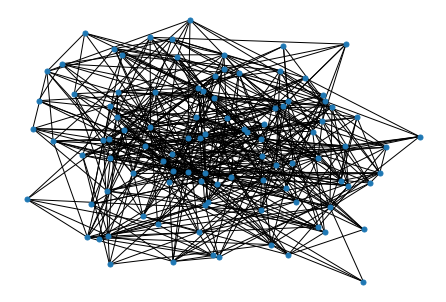

In [78]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from time import perf_counter as time


def adj_matrix(nodes_num, connections_num):
    
    """ random generation of adjacency matrix for wheithed
    graph with fixed numbers of nodes and connections """
    
    matrix = np.zeros([nodes_num, nodes_num])
    counter = 0

    while counter < connections_num:

        i, j = random.sample([i for i in range(nodes_num)], 2)

        if matrix[i][j] == 0:

            matrix[i][j] = matrix[j][i] = random.randint(1, connections_num) 
            counter += 1
            
    return matrix


# Testing----------------------------

random.seed(21)
nodes_num, connections_num = 100, 500 #5, 10

adj_matrix = adj_matrix(nodes_num, connections_num)  
print('Adjacency matrix fragment:\n\n', adj_matrix)

print('\nGraph vizualization:')
graph = nx.Graph(adj_matrix)
nx.draw(graph, node_size = 25)

In [95]:
def Dijkstra(graph, start_node):
    
    """given a weighted graph (with positive weights) and a source vertex, find
    shortest paths from the source to all other vertices """
    
    res = []
    for stop_node in range(len(graph)):
        if stop_node != start_node:
            res.append(nx.dijkstra_path(graph, start_node, stop_node))
    
    return res


def Bellman_Ford(graph, start_node):
    
    """given a weighted graph (with positive weights) and a source vertex, find
    shortest paths from the source to all other vertices """

    res = []
    for stop_node in range(len(graph)):
        if stop_node != start_node:
            res.append(nx.bellman_ford_path(graph, start_node, stop_node))
    
    return res


def A_star():
    pass


# Testing-----------

node = random.randint(0, nodes_num - 1)
DA_time, BFA_time = [], []

for i in range(10):

    start_time = time() 
    Dijkstra(graph, node)
    stop_time = time()
    DA_time.append(stop_time - start_time)
    
    start_time = time() 
    Bellman_Ford(graph, node)
    stop_time = time()
    BFA_time.append(stop_time - start_time)


print("Average time of Dijkstra's search: {:f} sec\n".format(np.mean(DA_time)))
print("Average time of Bellman_Ford's search: {:f} sec\n".format(np.mean(BFA_time)))

Average time of Dijkstra's search: 0.034353 sec

Average time of Bellman_Ford's search: 0.146813 sec



In [93]:
print("{:f}".format(np.pi))

3.141593
